# Лабораторная работа №3.<br> Детекторы и дескрипторы особых точек в библиотеке OpenCV.

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

## 1. Детектор Харриса

In [2]:
img = cv.imread('capybara.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv.cornerHarris(gray, 2, 3, 0.04)
img[dst>=0.01*dst.max()]= [0,0,255]
cv.imwrite('capybara_harris.jpg', img)

True

## 2. Shi-Tomasi детектор & Good Features to Track

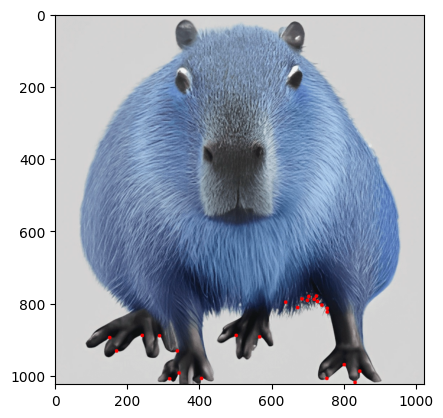

True

In [3]:
img = cv.imread('capybara.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray, 25, 0.01, 10)
corners = np.int_(corners)
for i in corners:
    x, y = i.ravel()
    cv.circle(img, (x,y), 5, 255,-1)

plt.imshow(img)
plt.show()
cv.imwrite('capybara_Shi_Tomasi.jpg', img)

## 3. Дескриптор SIFT

In [4]:
img = cv.imread('capybara.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
sift = cv.SIFT.create()
kp = sift.detect(gray, None)
img = cv.drawKeypoints(gray, kp,img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('capybara_SIFT.jpg', img)

True

## 4. Детектор FAST

In [5]:
img = cv.imread('capybara.jpg',0)
fast = cv.FastFeatureDetector.create()
kp = fast.detect(img, None)
img2 = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))
print(f"""
Treshold: {fast.getThreshold()}
nonmaxSuppression: {fast.getNonmaxSuppression()}
neighborhood: {fast.getType()}
Total Keypoins with nonmaxSupression: {len(kp)}
""")
cv.imwrite('capybara_FAST_true.jpg', img2)

fast.setNonmaxSuppression(False)
kp = fast.detect(img, None)
print(f'Total Keypoins with nonmaxSuppression: {len(kp)}')
img3 = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))
cv.imwrite('capybara_FAST_false.jpg', img3)


Treshold: 10
nonmaxSuppression: True
neighborhood: 2
Total Keypoins with nonmaxSupression: 23820

Total Keypoins with nonmaxSuppression: 64253


True

## 5. Дескриптор BRIEF

In [10]:
img = cv.imread('capybara.jpg',0)

star = cv.xfeatures2d.StarDetector.create()
brief = cv.xfeatures2d.BriefDescriptorExtractor.create()
kp = star.detect(img, None)
kp, des = brief.compute(img, kp)
print(f'Size Descriptor: {brief.descriptorSize()}\n Descriptor shape: {des.shape}')
img = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))
cv.imwrite('capybara_BRIEF.jpg', img)




Size Descriptor: 32
 Descriptor shape: (284, 32)


True

## 6. Дескриптор ORB

In [12]:
img = cv.imread('capybara.jpg', 0)
orb = cv.ORB.create()
kp = orb.detect(img, None)
kp, des = orb.compute(img, kp)
print(f'Size Descriptor: {brief.descriptorSize()}\n Descriptor shape: {des.shape}')
img = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))
cv.imwrite('capybara_ORB.jpg', img)

Size Descriptor: 32
 Descriptor shape: (500, 32)


True

## Контрольные вопросы
1. **Какой из детекторов особых точек справляется лучше с обнаружением углов (отсекая особые точки, принадлежащие граням)? Какие именно углы из показанных ниже детектор смог обнаружить?**\
![Углы](angles.jpg)\
    **Shi-Tomasi**: Этот метод основывается на вычислении минимального из двух собственных значений структуры матрицы (структурного тензора). Он лучше справляется с задачей выделения углов за счёт своей более точной оценки "угловости" области, что позволяет игнорировать грани с сильными градиентами, но без резко изменяющегося направления. Это делает Shi-Tomasi предпочтительным методом, так как он более точно отделяет углы от точек на краях
2. **Какой детектор выводит углы, не отсекая грани?**\
    - **SIFT (Scale-Invariant Feature Transform)**: SIFT детектор создает ключевые точки, которые устойчивы к масштабированию, поворотам и изменению яркости. При этом он может выявлять углы и при этом не чувствителен к границам, поскольку анализирует особенности изображения на различных масштабах.
    - **SURF (Speeded-Up Robust Features)**: Подобно SIFT, SURF также способен выявлять углы и другие ключевые точки, не фокусируясь на гранях. Он работает быстрее, но сохраняет ключевые свойства, позволяя игнорировать детали, связанные с краями.
3. **Какой из дескрипторов позволяет вывести направления особых точек?**\
    **ORB (Oriented FAST and Rotated BRIEF)**: ORB комбинирует основные идеи FAST для обнаружения ключевых точек и BRIEF для их дескрипции, одновременно обеспечивая инвариантность к поворотам. При этом ORB также вычисляет ориентацию для ключевых точек.